In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving climate_nasa.csv to climate_nasa.csv


# **Load the Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('climate_nasa.csv')

In [ ]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (522, 5)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None


In [ ]:
print(df.describe())

       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


In [ ]:
print(df.isnull().sum())

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [ ]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           522 non-null    datetime64[ns, UTC]
 1   likesCount     522 non-null    int64              
 2   profileName    522 non-null    object             
 3   commentsCount  244 non-null    float64            
 4   text           504 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 20.5+ KB


# **Exploratory Data Analysis and Data pre-processing**

In [ ]:
# Check missing values
missing_percent = df.isnull().mean() * 100
print("Missing values (%):\n", missing_percent)

Missing values (%):
 date              0.000000
likesCount        0.000000
profileName       0.000000
commentsCount    53.256705
text              3.448276
dtype: float64


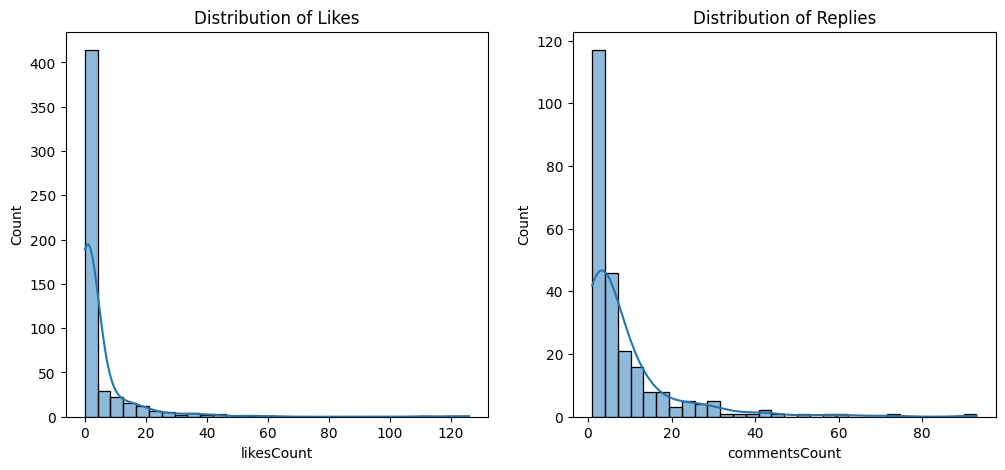

In [ ]:
# Distribution of Likes and Comments
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title('Distribution of Likes')

plt.subplot(1, 2, 2)
sns.histplot(df['commentsCount'], bins=30, kde=True)
plt.title('Distribution of Replies')
plt.show()

In [ ]:
# Drop rows where text is missing
df = df.dropna(subset=['text']).reset_index(drop=True)

In [ ]:
# Fill missing comments count with 0
df['commentsCount'] = df['commentsCount'].fillna(0).astype(int)

In [ ]:
# Confirm no more missing values
print(df.isnull().sum())

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

def get_sentiment_raw(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling
df['sentiment'] = df['text'].apply(get_sentiment_raw)

# Check distribution
print(df['sentiment'].value_counts())

sentiment
neutral     291
positive    150
negative     63
Name: count, dtype: int64


In [ ]:
df.head()

,date,likesCount,profileName,commentsCount,text,sentiment
0,2022-09-07 17:12:32+00:00,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,0,Neat comparison I have not heard it before.\n ...,neutral
1,2022-09-08 14:51:13+00:00,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,0,An excellent way to visualise the invisible! T...,positive
2,2022-09-07 17:19:41+00:00,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3,Does the CO2/ghg in the troposphere affect the...,neutral
3,2022-09-08 00:51:30+00:00,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,0,excellent post! I defo feel the difference - o...,neutral
4,2022-09-07 19:06:20+00:00,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26,"Yes, and carbon dioxide does not harm the Eart...",negative


# **Task 1: Sentiment Analysis**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF on raw text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

    negative       0.33      0.08      0.12        13
     neutral       0.68      0.88      0.77        58
    positive       0.57      0.43      0.49        30

    accuracy                           0.64       101
   macro avg       0.53      0.46      0.46       101
weighted avg       0.60      0.64      0.60       101



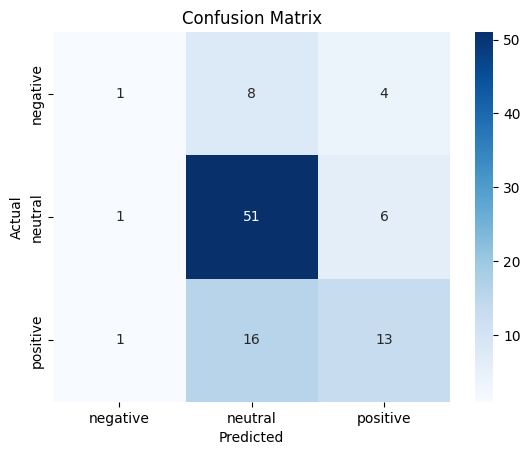

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])  # Raw text
y = df['sentiment']  # Label from TextBlob

# Oversample minority classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# New train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

              precision    recall  f1-score   support

    negative       0.91      0.91      0.91        58
     neutral       0.77      0.81      0.79        58
    positive       0.88      0.83      0.85        59

    accuracy                           0.85       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.85      0.85      0.85       175



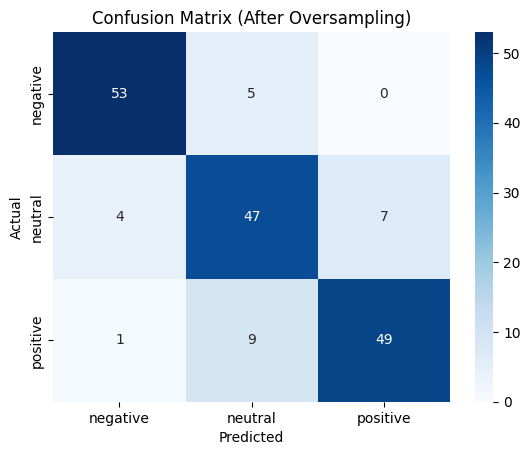

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After Oversampling)')
plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91        58
     neutral       0.77      0.81      0.79        58
    positive       0.88      0.83      0.85        59

    accuracy                           0.85       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.85      0.85      0.85       175



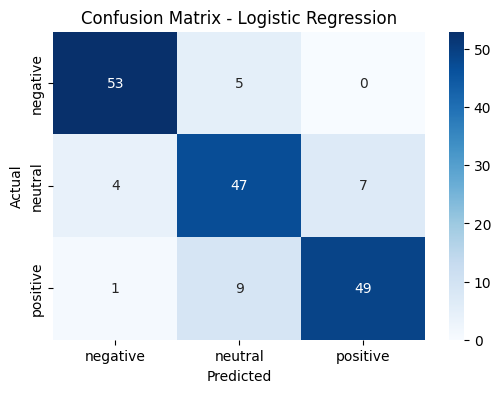


Decision Tree Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.95      0.95        58
     neutral       0.80      0.74      0.77        58
    positive       0.81      0.86      0.84        59

    accuracy                           0.85       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.85      0.85      0.85       175



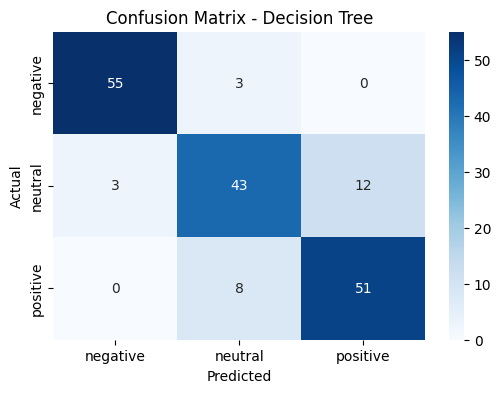


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.95      0.96        58
     neutral       0.77      0.91      0.83        58
    positive       0.94      0.78      0.85        59

    accuracy                           0.88       175
   macro avg       0.89      0.88      0.88       175
weighted avg       0.89      0.88      0.88       175



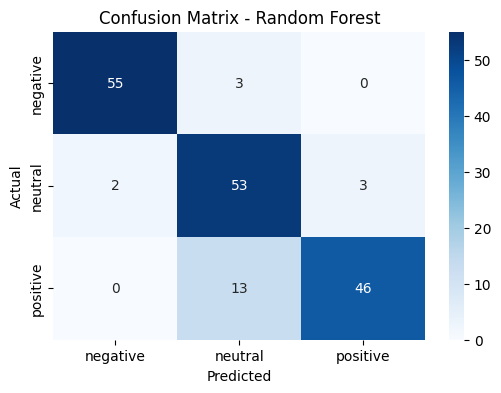


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.91      0.91        58
     neutral       0.68      0.74      0.71        58
    positive       0.81      0.73      0.77        59

    accuracy                           0.79       175
   macro avg       0.80      0.79      0.79       175
weighted avg       0.80      0.79      0.79       175



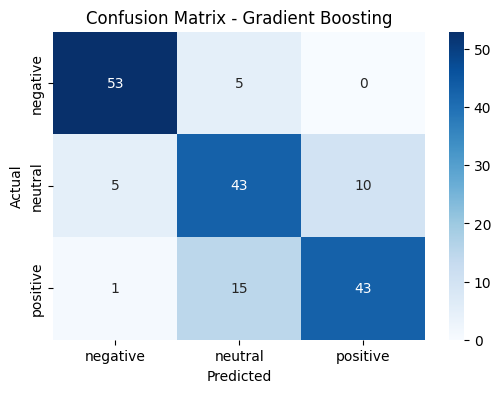


SVM Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.95      0.97        58
     neutral       0.77      0.98      0.86        58
    positive       0.98      0.76      0.86        59

    accuracy                           0.90       175
   macro avg       0.92      0.90      0.90       175
weighted avg       0.92      0.90      0.90       175



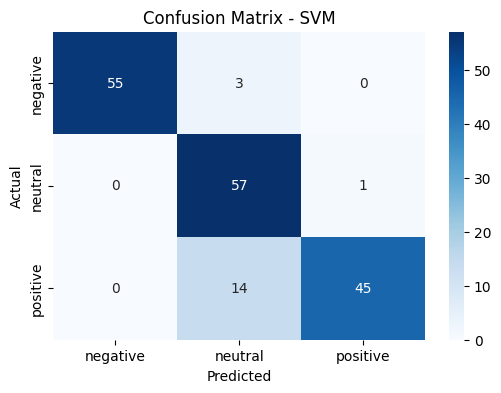


Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.897143,0.916532,0.897143,0.897843
1,Random Forest,0.880000,0.890877,0.880000,0.880840
2,Logistic Regression,0.851429,0.853220,0.851429,0.851962
3,Decision Tree,0.851429,0.851126,0.851429,0.850649
4,Gradient Boosting,0.794286,0.797468,0.794286,0.794707


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Create and display results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df = results_df.reset_index(drop=True)

print("\nModel Comparison:")
display(results_df)

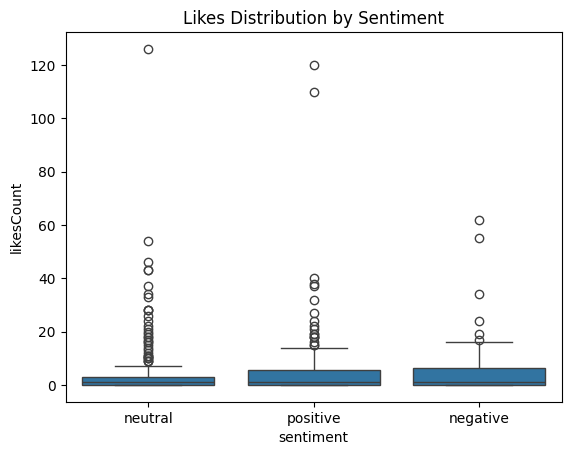

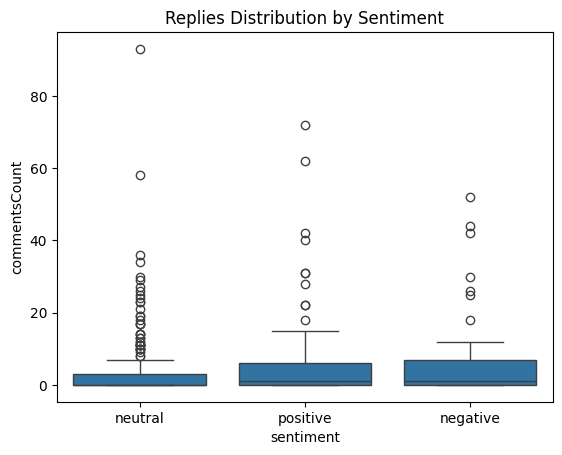

In [ ]:
sns.boxplot(x='sentiment', y='likesCount', data=df)
plt.title('Likes Distribution by Sentiment')
plt.show()

sns.boxplot(x='sentiment', y='commentsCount', data=df)
plt.title('Replies Distribution by Sentiment')
plt.show()

# **Task 2: Trend Analysis and Engagement Analysis**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ensure datetime is in correct format
df['date'] = pd.to_datetime(df['date'])

# Add 'year_month' column for grouping
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# Use predicted sentiment
if 'predicted_sentiment' in df.columns:
    sentiment_col = 'predicted_sentiment'
else:
    sentiment_col = 'sentiment'

# Group by year_month and sentiment
monthly_trend = df.groupby(['year_month', sentiment_col]).size().unstack(fill_value=0)

# Convert index to datetime for plotting
monthly_trend.index = pd.to_datetime(monthly_trend.index)

# Define color palette
colors = {
    'positive': '#2ca02c',  # green
    'neutral': '#ff7f0e',   # orange
    'negative': '#d62728'   # red
}

# Create the interactive plot
fig = go.Figure()

for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment in monthly_trend.columns:
        fig.add_trace(go.Scatter(
            x=monthly_trend.index,
            y=monthly_trend[sentiment],
            mode='lines+markers',
            name=sentiment.capitalize(),
            line=dict(width=2, color=colors[sentiment]),
            marker=dict(size=6),
            hovertemplate='Month: %{x|%b %Y}<br>Posts: %{y}<extra></extra>'
        ))

# Beautify layout
fig.update_layout(
    title='Sentiment Trend on NASA Climate Page',
    title_font_size=20,
    xaxis_title='Month',
    yaxis_title='Number of Posts',
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    font=dict(size=14),
    legend=dict(title='Sentiment')
)

fig.show()

<ipython-input-25-440101e2fb71>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M').astype(str)


           likesCount  commentsCount
sentiment                           
negative     6.126984       5.857143
neutral      3.893471       3.484536
positive     6.233333       4.860000


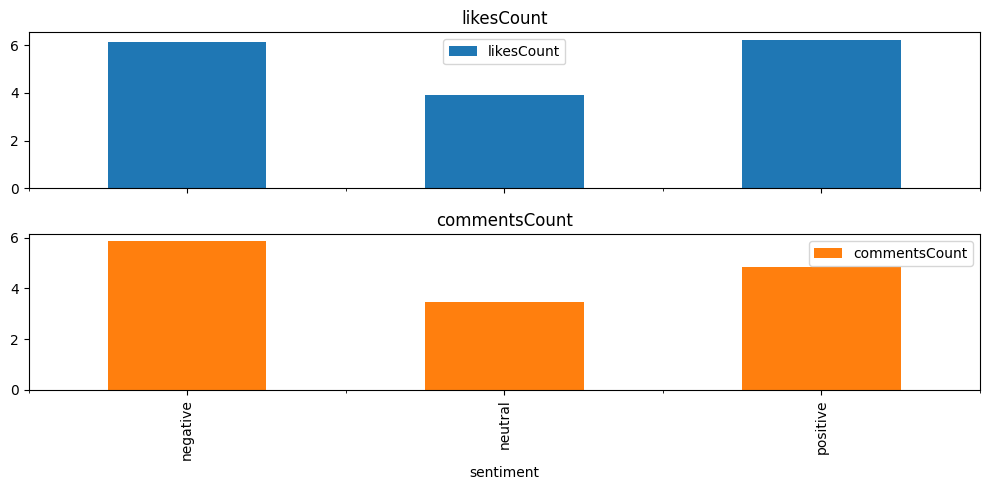

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

engagement_by_sentiment = df.groupby('sentiment')[['likesCount', 'commentsCount']].mean()
print(engagement_by_sentiment)

engagement_by_sentiment.plot(kind='bar', subplots=True, figsize=(10, 5))
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 most liked comments
top_liked = df.sort_values('likesCount', ascending=False).head(10)
print("Top 10 Liked Comments:")
print(top_liked[['text', 'sentiment', 'likesCount']])

# Top 10 most replied-to comments
top_replied = df.sort_values('commentsCount', ascending=False).head(10)
print("\nTop 10 Replied Comments:")
print(top_replied[['text', 'sentiment', 'commentsCount']])

Top 10 Liked Comments:
                                                  text sentiment  likesCount
416  I can only hope to someday attain the level of...   neutral         126
380  You are being gas-lighted. Have any of you hea...  positive         120
121  I love watch NASA dunk on people who think the...  positive         110
410  Too bad we don’t see Oct 1821 or 1721, just ke...  negative          62
433  To those who cite a very cold day as evidence ...  negative          55
208  I'm kinda surprised that the trolls blaming "E...   neutral          54
484  Waiting for the science illiterates to come te...   neutral          46
420  thank you for the research you do, and for sti...   neutral          43
105  It's worth remembering that land surfaces (red...   neutral          43
16   I find it interesting when people claim that C...  positive          40

Top 10 Replied Comments:
                                                  text sentiment  \
367                          It's al

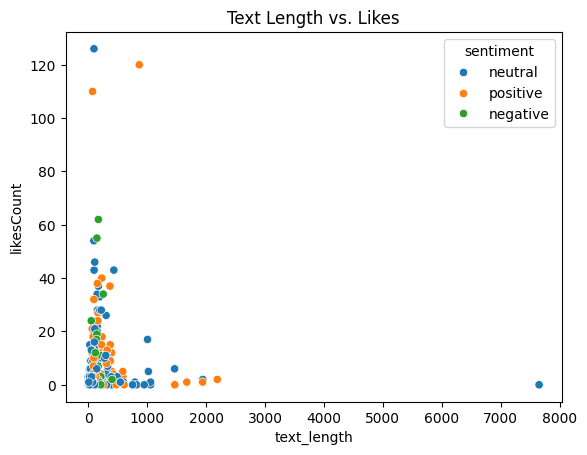

In [ ]:
# Add text length as a feature
df['text_length'] = df['text'].apply(len)

# Plot text length vs. likes
sns.scatterplot(data=df, x='text_length', y='likesCount', hue='sentiment')
plt.title('Text Length vs. Likes')
plt.show()

# **Task 3: Topic Modelling**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Text Vectorization
vectorizer = CountVectorizer(
    max_df=0.90,      # Slightly more inclusive than 0.95
    min_df=3,         # Require terms to appear in at least 3 docs
    stop_words='english',
    ngram_range=(1, 1)  # Start with just unigrams for stability
)

# Ensure text data is properly encoded
text_data = df['text'].astype(str).values
X_topic = vectorizer.fit_transform(text_data)

# LDA Model Training
lda = LatentDirichletAllocation(
    n_components=5,           # Number of topics
    random_state=42,
    learning_method='batch',
    max_iter=20,              # Increased iterations
    n_jobs=1,                 # Disable parallel processing to avoid serialization issues
    verbose=1
)

# Fit the model with error handling
try:
    lda.fit(X_topic)
    print("LDA model trained successfully!")
except Exception as e:
    print(f"Error training LDA model: {e}")
    raise

# Display Top Words
def print_top_words(model, feature_names, n_top_words=10):
    """Print top words for each topic with better formatting"""
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic {topic_idx + 1}: "
        message += ", ".join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print("\nTop words per topic:")
print_top_words(lda, vectorizer.get_feature_names_out())

# Document-Topic Assignment
df['dominant_topic'] = lda.transform(X_topic).argmax(axis=1)

# Show sample documents with their topics
print("\nSample documents with assigned topics:")
for i in range(min(5, len(df))):
    print(f"Document {i+1} (Topic {df['dominant_topic'][i]+1}):")
    print(df['text'].iloc[i][:200] + "...")  # Show first 200 chars
    print()

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20
LDA model trained successfully!

Top words per topic:
Topic 1: climate, change, earth, planet, man, energy, graph, global, warming, nasa
Topic 2: carbon, co2, atmosphere, years, dioxide, water, earth, level, sea, rise
Topic 3: climate, change, nasa, people, data, going, year, just, years, maybe
Topic 4: time, warming, ice, age, climate, global, science, people, don, change
Topic 5: climate, human, global, 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assign dominant topic to each comment
topic_results = lda.transform(X_topic)
df['dominant_topic'] = topic_results.argmax(axis=1) + 1  # Topic numbers start at 1

# View topic distribution
print("Topic Distribution:")
print(df['dominant_topic'].value_counts())

Topic Distribution:
dominant_topic
1    151
3    148
4     90
5     61
2     54
Name: count, dtype: int64


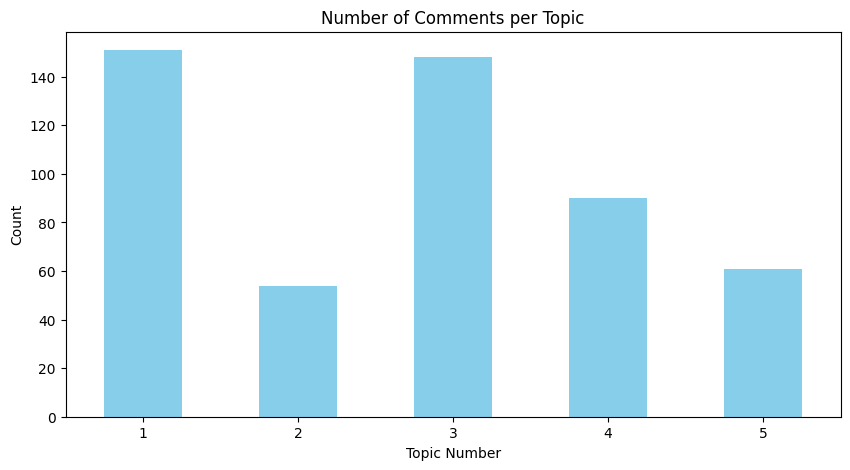

In [ ]:
# 3. Plot topic distribution
plt.figure(figsize=(10, 5))
df['dominant_topic'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Comments per Topic')
plt.xlabel('Topic Number')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

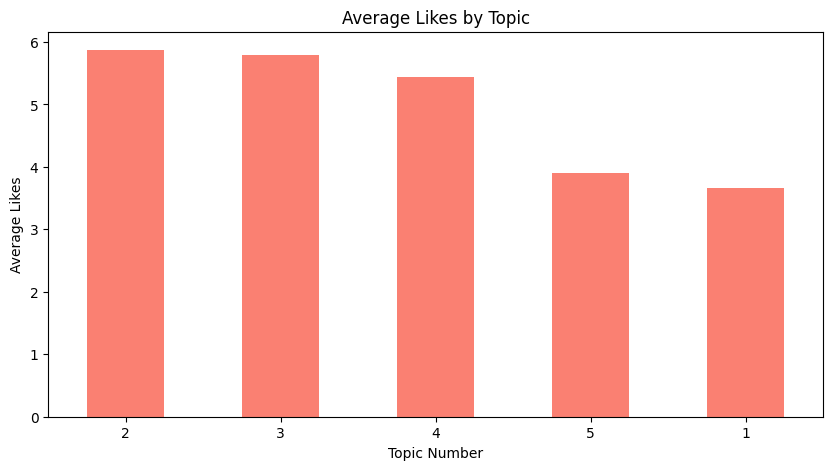

In [ ]:
# 4. Plot average likes by topic
plt.figure(figsize=(10, 5))
topic_engagement = df.groupby('dominant_topic')['likesCount'].mean().sort_values(ascending=False)
topic_engagement.plot(kind='bar', color='salmon')
plt.title('Average Likes by Topic')
plt.xlabel('Topic Number')
plt.ylabel('Average Likes')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

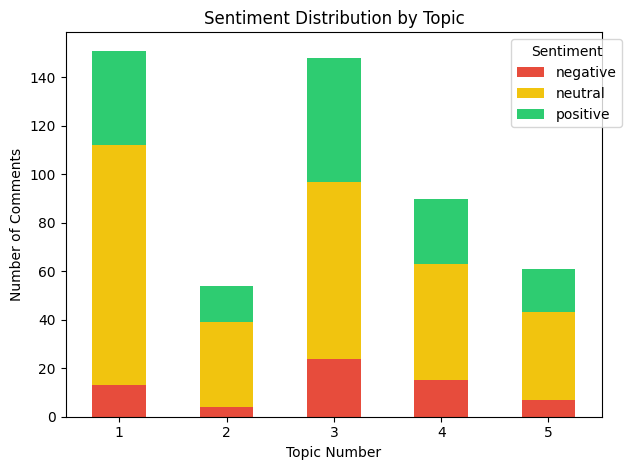

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))

# Create crosstab
sentiment_dist = pd.crosstab(df['dominant_topic'], df['sentiment'])

# Ensure consistent column order
sentiment_order = ['negative', 'neutral', 'positive']
sentiment_dist = sentiment_dist[sentiment_order]

# Define custom colors for sentiment
colors = ['#e74c3c', '#f1c40f', '#2ecc71']

# Plot
sentiment_dist.plot(kind='bar', stacked=True, color=colors)
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic Number')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Create comprehensive summary table
topic_summary = pd.DataFrame({
    'Top Words': [", ".join([vectorizer.get_feature_names_out()[i]
                           for i in topic.argsort()[:-10 - 1:-1]])
                for topic in lda.components_],
    'Avg Likes': df.groupby('dominant_topic')['likesCount'].mean(),
    'Total Comments': df['dominant_topic'].value_counts().sort_index(),
    'Positive %': pd.crosstab(df['dominant_topic'], df['sentiment'], normalize='index')['positive']*100,
    'Negative %': pd.crosstab(df['dominant_topic'], df['sentiment'], normalize='index')['negative']*100,
    'Neutral %': pd.crosstab(df['dominant_topic'], df['sentiment'], normalize='index')['neutral']*100
}, index=range(1, 6))

print("\nComprehensive Topic Summary:")
display(topic_summary.style.format({
    'Avg Likes': '{:.1f}',
    'Positive %': '{:.1f}%',
    'Negative %': '{:.1f}%',
    'Neutral %': '{:.1f}%'
}).background_gradient(subset=['Avg Likes', 'Total Comments'], cmap='Blues'))


Comprehensive Topic Summary:


,Top Words,Avg Likes,Total Comments,Positive %,Negative %,Neutral %
1,"climate, change, earth, planet, man, energy, graph, global, warming, nasa",3.7,151,25.8%,8.6%,65.6%
2,"carbon, co2, atmosphere, years, dioxide, water, earth, level, sea, rise",5.9,54,27.8%,7.4%,64.8%
3,"climate, change, nasa, people, data, going, year, just, years, maybe",5.8,148,34.5%,16.2%,49.3%
4,"time, warming, ice, age, climate, global, science, people, don, change",5.4,90,30.0%,16.7%,53.3%
5,"climate, human, global, warming, planet, like, change, activity, think, greenhouse",3.9,61,29.5%,11.5%,59.0%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Calculate text-based features
df['text_length'] = df['text'].apply(len)               # Character count
df['word_count'] = df['text'].apply(lambda x: len(x.split()))  # Word count
df['has_question'] = df['text'].str.contains('\?').astype(int)  # Binary: contains question?
df['sentiment_polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Sentiment score (-1 to +1)
df['sentiment_subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)  # Subjective vs. objective

# Display new features
print(df[['text', 'likesCount', 'text_length', 'word_count', 'has_question', 'sentiment_polarity']].head(3))

                                                text  likesCount  text_length  \
0  Neat comparison I have not heard it before.\n ...           2          173   
1  An excellent way to visualise the invisible! T...           0           51   
2  Does the CO2/ghg in the troposphere affect the...           1          108   

   word_count  has_question  sentiment_polarity  
0          32             0                 0.0  
1           8             0                 0.6  
2          16             1                 0.0  


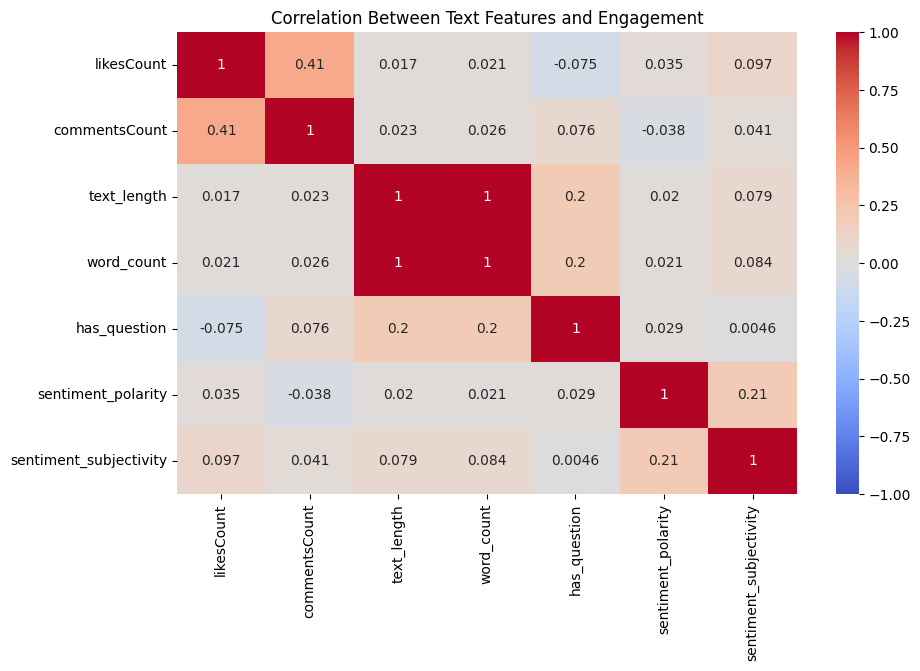

In [ ]:
# Select numeric features and engagement metrics
numeric_cols = ['likesCount', 'commentsCount', 'text_length', 'word_count',
                'has_question', 'sentiment_polarity', 'sentiment_subjectivity']
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Between Text Features and Engagement')
plt.show()